<a href="https://colab.research.google.com/github/SiiHyunn/DipLearning_2021/blob/main/Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step


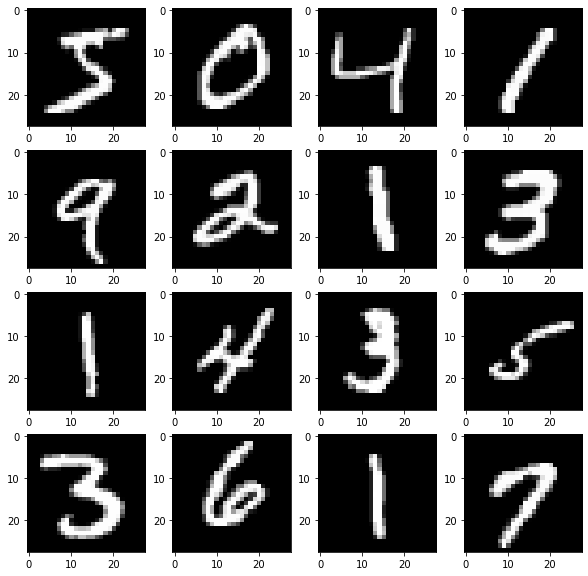

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

plt.figure(figsize = (10, 10))
for c in range(16):
  plt.subplot(4, 4, c+1)
  plt.imshow(train_X[c].reshape(28,28), cmap = 'gray')

plt.show()

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(units=128, activation = 'relu'),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g--', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
1385/1407 [============================>.] - ETA: 0s - loss: 0.3055 - accuracy: 0.9129

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
from PIL import Image
from io import BytesIO
import cv2
from google.colab import files

uploaded = files.upload()

img_9 = Image.open(BytesIO(uploaded['img1.png'])).convert('L')
img_9=np.array(img_9)
img_9=img_9/255.0

img_2 = Image.open(BytesIO(uploaded['img2.png'])).convert('L')
img_2=np.array(img_2)
img_2=img_2/255.0

img_5 = Image.open(BytesIO(uploaded['img3.png'])).convert('L')
img_5=np.array(img_5)
img_5=img_5/255.0

img_6 = Image.open(BytesIO(uploaded['img4.png'])).convert('L')
img_6=np.array(img_6)
img_6=img_6/255.0

img_7 = Image.open(BytesIO(uploaded['img5.png'])).convert('L')
img_7=np.array(img_7)
img_7=img_7/255.0

Saving img1.png to img1.png
Saving img2.png to img2.png
Saving img3.png to img3.png
Saving img4.png to img4.png
Saving img5.png to img5.png


In [ ]:
image_X =np.array([img_9,img_2,img_5, img_6, img_7])
image_Y = np.array([9, 2, 5, 6, 7])
print(tf.argmax(model.predict(image_X), axis = 1))
model.evaluate(image_X, image_Y)

tf.Tensor([8 2 2 5 7], shape=(5,), dtype=int64)
1/1 [==============================] - 0s 29ms/step - loss: 7.9110 - accuracy: 0.4000


[7.9109907150268555, 0.4000000059604645]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

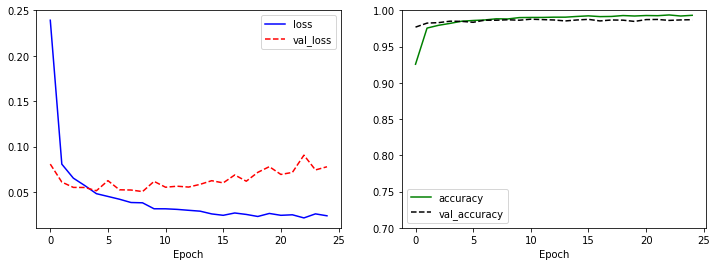

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=20, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
print(tf.argmax(model.predict(image_X), axis = 1))
model.evaluate(image_X, image_Y)

tf.Tensor([9 2 5 2 7], shape=(5,), dtype=int64)
1/1 [==============================] - 0s 159ms/step - loss: 0.4886 - accuracy: 0.8000


[0.488598495721817, 0.800000011920929]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

Epoch 1/25
1407/1407 [==============================] - 301s 213ms/step - loss: 0.4623 - accuracy: 0.8482 - val_loss: 0.0724 - val_accuracy: 0.9788
Epoch 2/25
1407/1407 [==============================] - 307s 218ms/step - loss: 0.1374 - accuracy: 0.9608 - val_loss: 0.0556 - val_accuracy: 0.9847
Epoch 3/25
1407/1407 [==============================] - 306s 218ms/step - loss: 0.1155 - accuracy: 0.9684 - val_loss: 0.0435 - val_accuracy: 0.9872
Epoch 4/25
1407/1407 [==============================] - 307s 218ms/step - loss: 0.1032 - accuracy: 0.9716 - val_loss: 0.0454 - val_accuracy: 0.9865
Epoch 5/25
1407/1407 [==============================] - 307s 219ms/step - loss: 0.0992 - accuracy: 0.9733 - val_loss: 0.0572 - val_accuracy: 0.9842
Epoch 6/25
 480/1407 [=========>....................] - ETA: 3:09 - loss: 0.0937 - accuracy: 0.9745

KeyboardInterrupt: ignored

In [ ]:
print(tf.argmax(model.predict(image_X), axis = 1))
model.evaluate(image_X, image_Y)

tf.Tensor([9 2 5 6 7], shape=(5,), dtype=int64)
1/1 [==============================] - 0s 176ms/step - loss: 2.6510e-05 - accuracy: 1.0000


[2.6510451789363287e-05, 1.0]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 10000

randidx = np.random.randint(train_X.shape[0], size=augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(70000, 28, 28, 1)


Epoch 1/25
1641/1641 [==============================] - 30s 18ms/step - loss: 0.2512 - accuracy: 0.9214 - val_loss: 1.0933 - val_accuracy: 0.7717
Epoch 2/25
1641/1641 [==============================] - 29s 18ms/step - loss: 0.0916 - accuracy: 0.9746 - val_loss: 1.4478 - val_accuracy: 0.7670
Epoch 3/25
1641/1641 [==============================] - 29s 18ms/step - loss: 0.0751 - accuracy: 0.9793 - val_loss: 1.0848 - val_accuracy: 0.7937
Epoch 4/25
1641/1641 [==============================] - 29s 18ms/step - loss: 0.0640 - accuracy: 0.9823 - val_loss: 1.1230 - val_accuracy: 0.7971
Epoch 5/25
1641/1641 [==============================] - 29s 18ms/step - loss: 0.0609 - accuracy: 0.9832 - val_loss: 1.2138 - val_accuracy: 0.7885
Epoch 6/25
1641/1641 [==============================] - 31s 19ms/step - loss: 0.0539 - accuracy: 0.9850 - val_loss: 1.2966 - val_accuracy: 0.7979
Epoch 7/25
1641/1641 [==============================] - 29s 18ms/step - loss: 0.0526 - accuracy: 0.9857 - val_loss: 1.4513 -

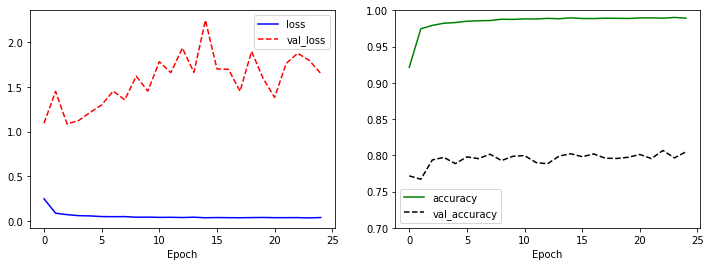

[0.024716287851333618, 0.994700014591217]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
print(tf.argmax(model.predict(image_X), axis = 1))
model.evaluate(image_X, image_Y)

tf.Tensor([9 2 5 6 7], shape=(5,), dtype=int64)
1/1 [==============================] - 0s 182ms/step - loss: 5.6283e-05 - accuracy: 1.0000


[5.628270446322858e-05, 1.0]